Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Data Loading and Data Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

print(df.head())
print(df.shape)

# Data Preprocessing
df['attack_type'] = pd.cut(df['nkill'], bins=[0, 2, 10, float('inf')], labels=['minor', 'small', 'major'])
relevant_columns = ['iyear', 'attack_type', 'nkill']
df_subset = df[relevant_columns]

# Removing rows with missing values by creating a copy of the subset DataFrame
df_subset = df_subset.dropna().copy()

# Displaying the cleaned subset of the dataset
print(df_subset.head())


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

B)

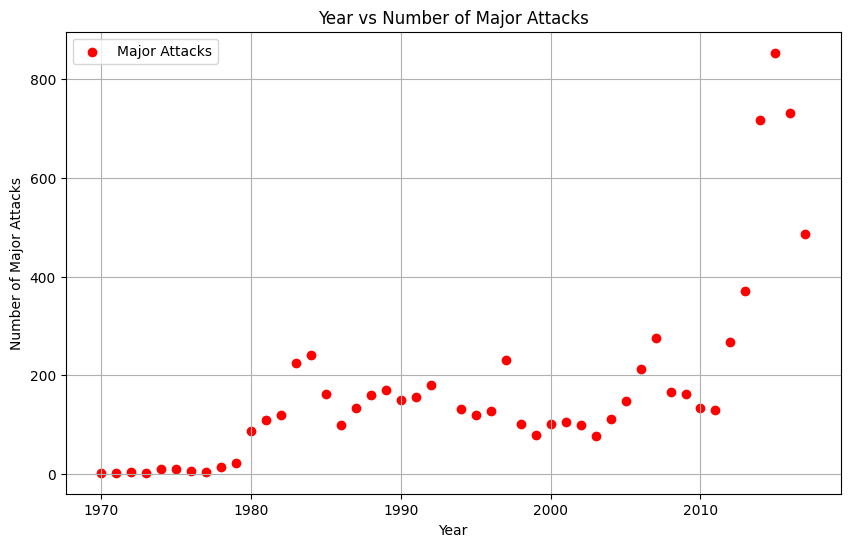

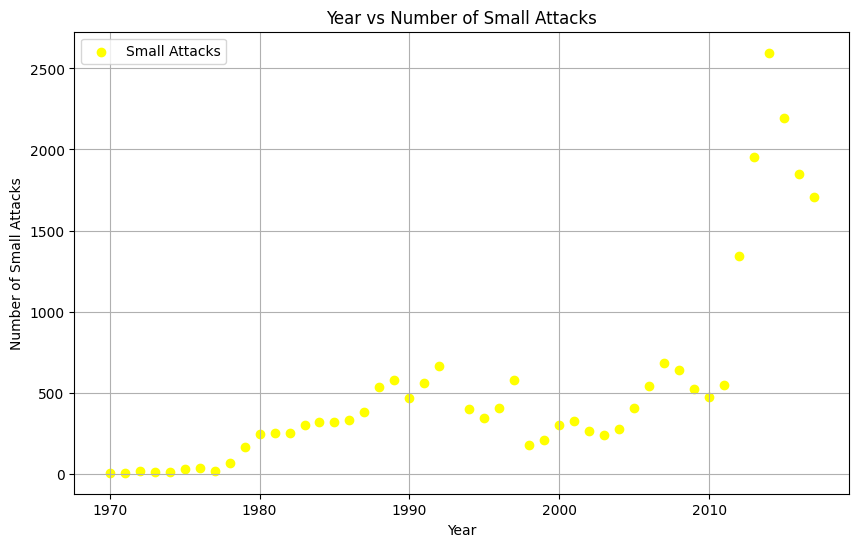

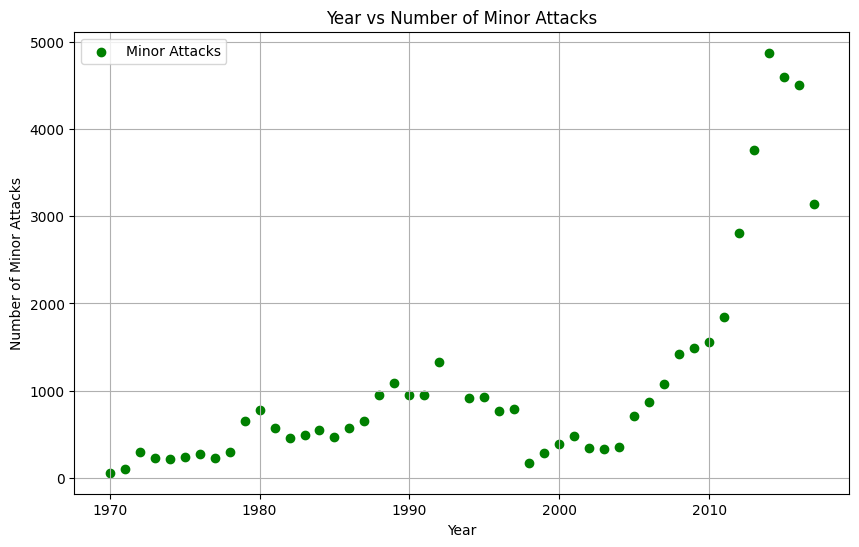

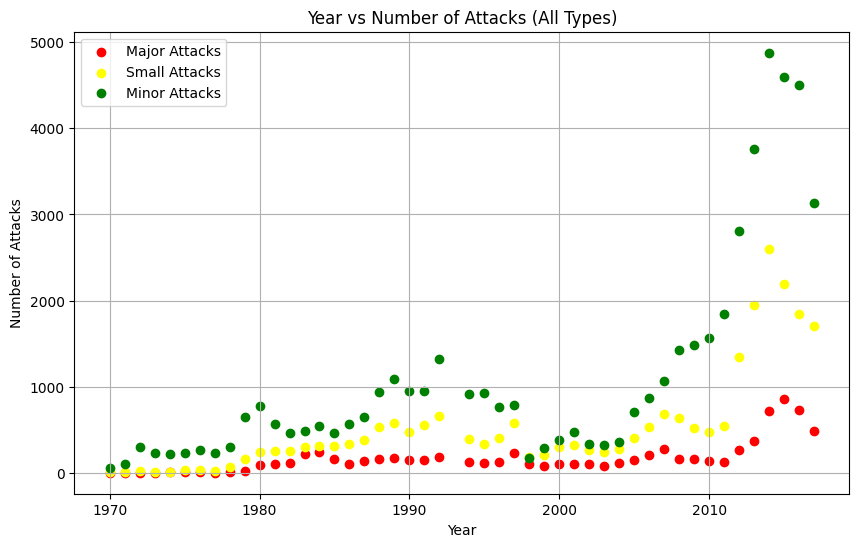

In [6]:
attacks_by_year_type = df.groupby(['iyear', 'attack_type']).size().unstack(fill_value=0)

# Scatter plot for major attacks
plt.figure(figsize=(10, 6))
plt.scatter(attacks_by_year_type.index, attacks_by_year_type['major'], color='red', label='Major Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Major Attacks')
plt.title('Year vs Number of Major Attacks')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for small attacks
plt.figure(figsize=(10, 6))
plt.scatter(attacks_by_year_type.index, attacks_by_year_type['small'], color='yellow', label='Small Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Small Attacks')
plt.title('Year vs Number of Small Attacks')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for minor attacks
plt.figure(figsize=(10, 6))
plt.scatter(attacks_by_year_type.index, attacks_by_year_type['minor'], color='green', label='Minor Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Minor Attacks')
plt.title('Year vs Number of Minor Attacks')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for all attacks together
plt.figure(figsize=(10, 6))
plt.scatter(attacks_by_year_type.index, attacks_by_year_type['major'], color='red', label='Major Attacks')
plt.scatter(attacks_by_year_type.index, attacks_by_year_type['small'], color='yellow', label='Small Attacks')
plt.scatter(attacks_by_year_type.index, attacks_by_year_type['minor'], color='green', label='Minor Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Year vs Number of Attacks (All Types)')
plt.legend()
plt.grid(True)
plt.show()

C

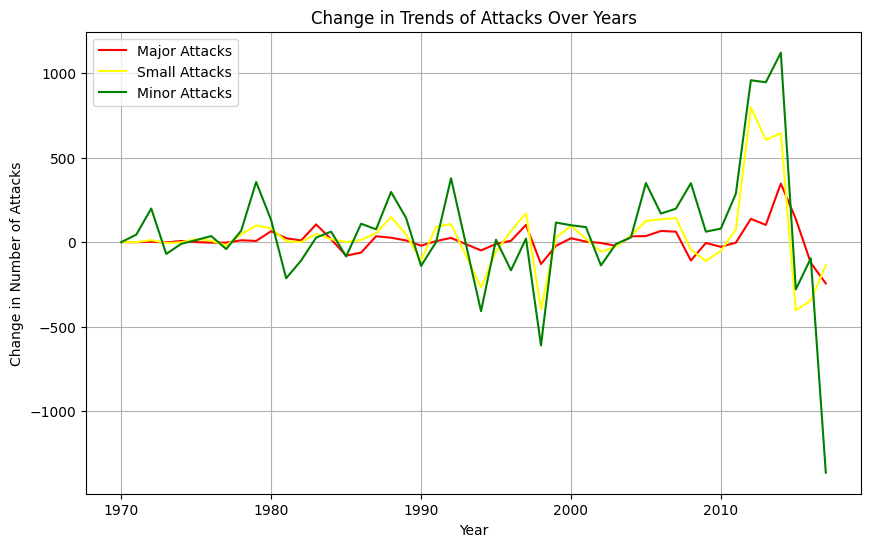

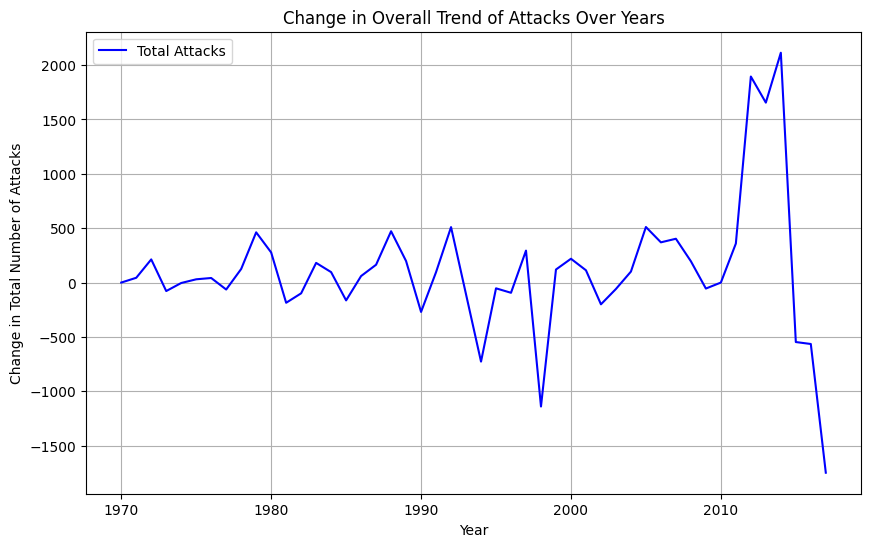

In [7]:
diff_major = attacks_by_year_type['major'].diff().fillna(0)
diff_small = attacks_by_year_type['small'].diff().fillna(0)
diff_minor = attacks_by_year_type['minor'].diff().fillna(0)

# Plotting trends for each attack type
plt.figure(figsize=(10, 6))

plt.plot(attacks_by_year_type.index, diff_major, label='Major Attacks', color='red')
plt.plot(attacks_by_year_type.index, diff_small, label='Small Attacks', color='yellow')
plt.plot(attacks_by_year_type.index, diff_minor, label='Minor Attacks', color='green')

plt.xlabel('Year')
plt.ylabel('Change in Number of Attacks')
plt.title('Change in Trends of Attacks Over Years')
plt.legend()
plt.grid(True)
plt.show()


D)

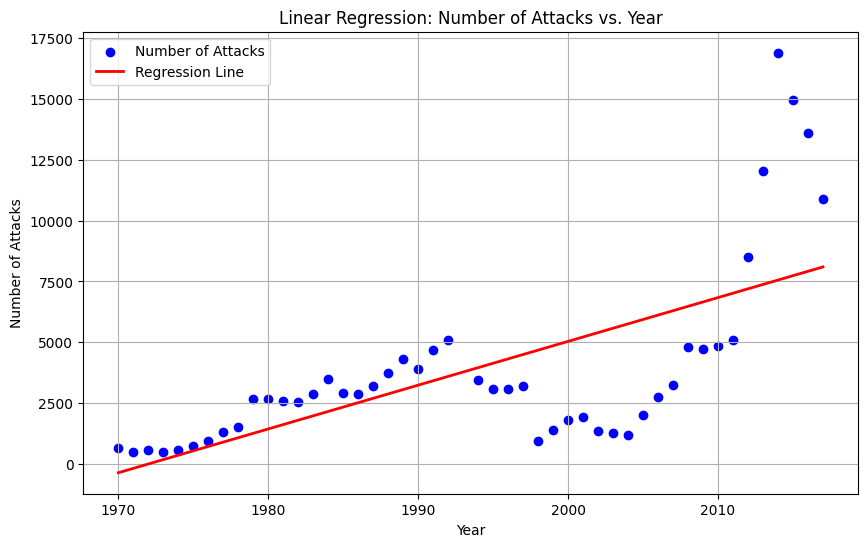

Regression Coefficients:
Coefficient: 180.04630767382992


In [51]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

attacks_by_year = df.groupby('iyear').size()
X = attacks_by_year.index.to_frame()
y = attacks_by_year.values.reshape(-1, 1)
# Perform linear regression
regression = LinearRegression().fit(X, y)
# Plotting scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Number of Attacks')
plt.plot(X, regression.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Linear Regression: Number of Attacks vs. Year')
plt.legend()
plt.grid(True)
plt.show()

print("Regression Coefficients:")
print(f"Coefficient: {regression.coef_[0][0]}")


Regression Coefficient (Minor Attacks): 59.62593543857056
Regression Coefficient (Small Attacks): 30.284999260888053
Regression Coefficient (Major Attacks): 8.825853674310316


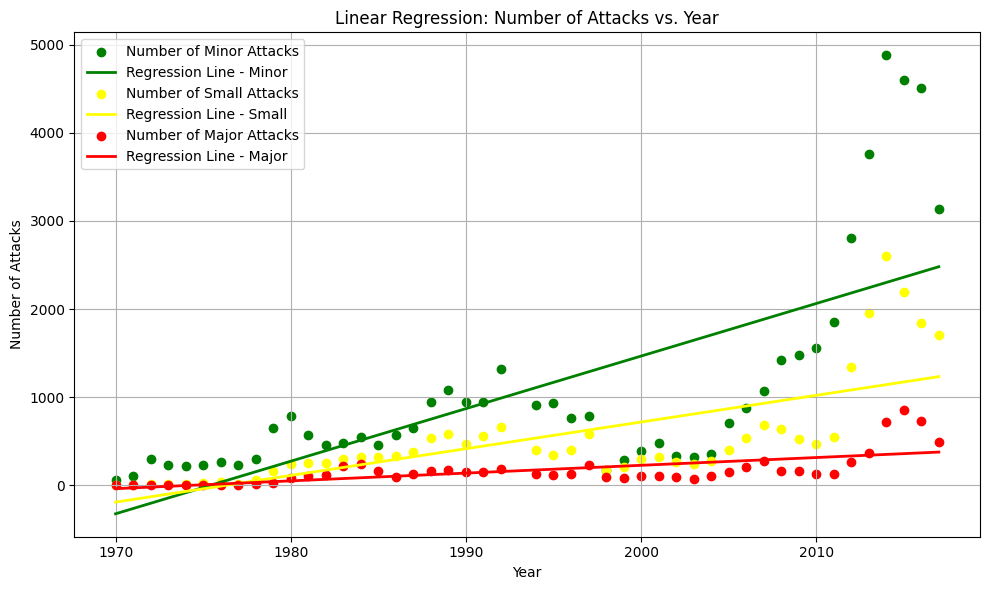

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

attacks_by_year_type = df.groupby(['iyear', 'attack_type']).size().unstack(fill_value=0)
# Performing linear regression for each attack type
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'minor': 'green', 'small': 'yellow', 'major': 'red'}
for attack_type, color in colors.items():
    X = attacks_by_year_type.index.to_frame()
    y = attacks_by_year_type[attack_type].values.reshape(-1, 1)
    regression = LinearRegression().fit(X, y)
   # Plotting scatter plot and regression line for each attack type
    ax.scatter(X, y, color=color, label=f'Number of {attack_type.capitalize()} Attacks')
    ax.plot(X, regression.predict(X), color=color, linewidth=2, label=f'Regression Line - {attack_type.capitalize()}')
    print(f"Regression Coefficient ({attack_type.capitalize()} Attacks): {regression.coef_[0][0]}")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
ax.set_title('Linear Regression: Number of Attacks vs. Year')
ax.legend()
ax.grid(True)
plt.tight_layout() 
plt.show()
